This notebook closely follows Chapter 3 in:
> &copy; Manohar Swamynathan 2019
>
> M. SwamynathanMastering Machine Learning with Python in Six Steps
>
> https://doi.org/10.1007/978-1-4842-4947-5_4

Supervised Learning-Classification
==================================
> In ML, classification deals with identifying the probability a new object is a member of a class or set. The classifiers are the algorighms that map the input data (also called features) to categories.


Logistic Regression
-------------------


In [1]:
import sklearn.linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.style.use(['seaborn-talk', 'seaborn-darkgrid'])

# Load data
df = pd.read_csv("../data/Grade_Set_1_Classification.csv")
df

,Hours_Studied,Result
0,2,0
1,3,0
2,4,0
3,5,1
4,6,1
5,7,1
6,8,1
7,9,1
8,10,1


R Squared: 0.675
Mean Absolute Error: 0.2296296296296296
Root Mean Squared Error: 0.26874192494328497


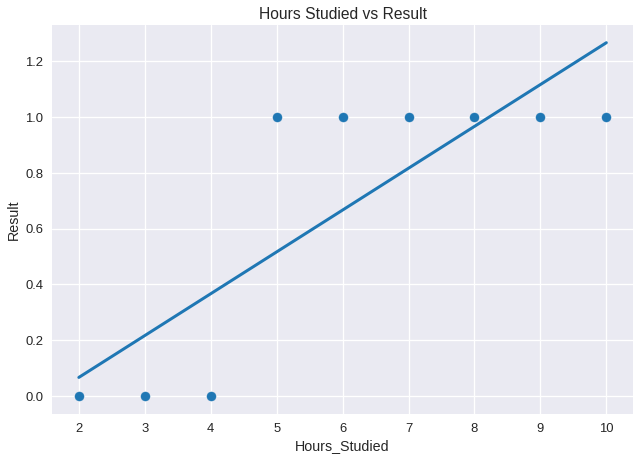

In [2]:
x = df.Hours_Studied[:, np.newaxis]
y = df.Result

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)
y_p = lr.predict(x)

# Plot the fit line
plt.scatter(x, y)
plt.plot(x, y_p, lw=3)
plt.title("Hours Studied vs Result")
plt.xlabel("Hours_Studied")
plt.ylabel("Result")

# Add predict value to the dataframe
df['Result_Pred'] = y_p

# Using built-in function
print("R Squared:", r2_score(df.Result, df.Result_Pred))
print("Mean Absolute Error:", mean_absolute_error(df.Result, df.Result_Pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(df.Result, df.Result_Pred)))

Solution:
> Introduce a sigmoid or logit function (which takes an S shape) to the regression equation.

> The fundamental idea here is that the hypothesis will use the linear approximation, then map with a logistic function for binary prediction.

\begin{equation}
\text{odds ratio of pass vs fail} = \text{probability} (\gamma = 1) / \left[1 - \text{probability} (\gamma = 1) \right]
\end{equation}

> A logit is the log base e of the odds:
\begin{equation}
\log (p / (1 - p)) = mx + c
\end{equation}

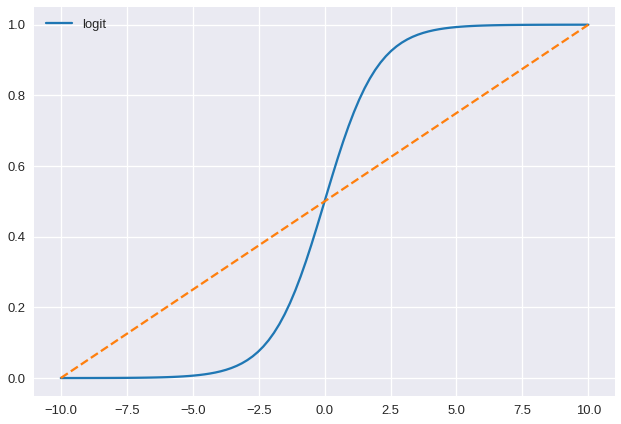

In [3]:
# Plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, label="logit")
plt.plot(x[[0, -1]], y[[0, -1]], '--')
plt.legend()

In [4]:
from sklearn.linear_model import LogisticRegression

# Manually assign intercept
df['intercept'] = 1
independent_variables = ['Hours_Studied', 'intercept']

x = df[independent_variables]
y = df['Result']

model = LogisticRegression()
model = model.fit(x, y)

# Check the accuracy on the training set
model.score(x, y)

print("Predicted probability:\n", model.predict_proba(x)[:, 1])

print("Predicted class:\n", model.predict(x))

Predicted probability:
 [0.05368062 0.15313611 0.36565616 0.64757973 0.85417548 0.94916743
 0.98347736 0.99475738 0.99834945]
Predicted class:
 [0 0 0 1 1 1 1 1 1]


Text(0, 0.5, 'Result')

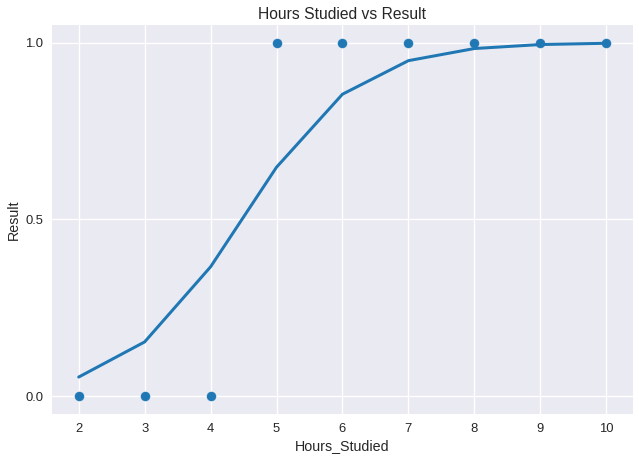

In [5]:
plt.scatter(df.Hours_Studied, y)
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.Hours_Studied, model.predict_proba(x)[:, 1], linewidth=3)
plt.title("Hours Studied vs Result")
plt.xlabel("Hours_Studied")
plt.ylabel("Result")

Evaluating a Classification Model Performance
---------------------------------------------
> - True Negative (TN): Actual FALSE that was predicted as FALSE
> - False Positive (FP): Actual FALSE that was predicted as TRUE (Type I error)
> - False Negative (FN): Actual TRUE that was predicted as FALSE (Type II error)
> - True Positive (TP): Actual TRUE that was predicted as TRUE

Classification Performance Matrices

| Metric | Description | Formula |
| ------ | ----------- | ------- |
| Accuracy | What % of predictions was correct? | (TP + TN) / (TP + TN + FP + FN) |
| Misclasification Rate | What % of prediction is wrong? | (FP + FN) / (TP + TN + FP + FN) |
| True Positive Rate OR Sensitivity or Recall (completeness) | What % of positive cases did the model catch? | TP / (FN + TP) |
| False Positive Rate | What % of No was predicted as Yes? | FP / (FP + TN) |
| Specificity | What % of No was predicted as No? | TN / (TN + FP) |
| Precision (exactness) | What % of positive predictions was correct? | TP / (TP + FP) |
| F1 score | Weighted average of precision and recall | 2 * (precision * recall) / (precision + recall) |


In [6]:
from sklearn import metrics

y_p = model.predict(x)

# Generate evaluation metrics
print("Accuracy:\n", metrics.accuracy_score(y, y_p))
print("AUC:\n", metrics.roc_auc_score(y, model.predict_proba(x)[:, 1]))

print("Confusion matrix:\n", metrics.confusion_matrix(y, model.predict(x)))
print("Classification report:\n", metrics.classification_report(y, y_p))

Accuracy:
 1.0
AUC:
 1.0
Confusion matrix:
 [[3 0]
 [0 6]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



ROC Curve
---------
> An ROC (receiver operating characteristic) curve is one more important metric, a most commonly used way to visualize the performance of a binary claaier; and AUC is believed to be one of the best ways to summarize performance in a single number. AUC indicated that the probability of a randomly selected positive example will be scored higher by the classifier than a randomly selected negative example.

In [7]:
# Determin the false positive and true positive rated
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:, 1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 1.00


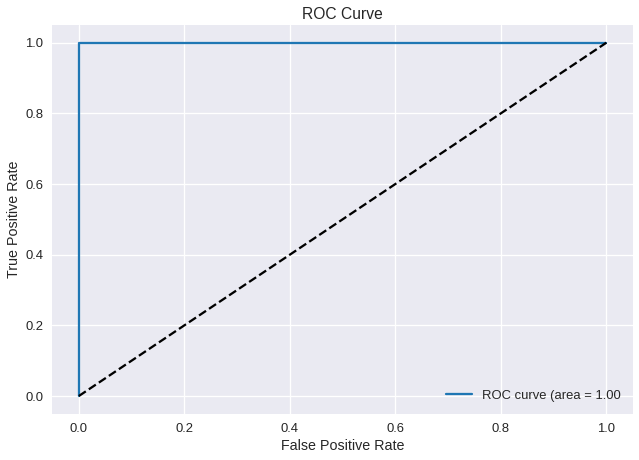

In [8]:
# Plot of a ROC curve for a specific class
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

Fitting Line
------------

C =    1,	Accuracy: 1.0
C =   10,	Accuracy: 1.0
C =  100,	Accuracy: 1.0
C = 1000,	Accuracy: 1.0


Text(0, 0.5, 'Result')

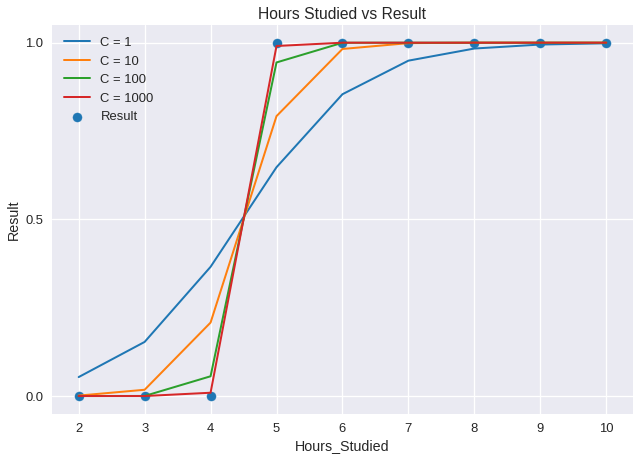

In [9]:
# Instantiate a logistic regression model with different c values, and fit with x and y
models = []
Cs = [1, 10, 100, 1000]
for C in Cs:
    model = LogisticRegression(C=C)
    model = model.fit(x, y)
    models.append(model)
    y_p = model.predict(x)

    # Check the accuracy on the training set
    print(f"{C = :4d},\tAccuracy: {metrics.accuracy_score(y, y_p)}")

# Plot fit line
plt.scatter(df.Hours_Studied, y, label="Result")
plt.yticks([0.0, 0.5, 1.0])

for i in range(len(Cs)):
    C = Cs[i]
    model = models[i]
    plt.plot(df.Hours_Studied, model.predict_proba(x)[:, 1], lw=2, label=f"{C = }")

plt.legend()
plt.title("Hours Studied vs Result")
plt.xlabel("Hours_Studied")
plt.ylabel("Result")

> In the case of regression problems, the *cost function* $J$ to learn the weights can be defined as the sum of squared errors (SSE) between actual vs. predicted value.
\begin{equation}
J(w) = \frac{1}{2} \sum_i \left( y^i - \hat{y}^i \right),
\end{equation}
> where $y^i$ is the $i$-th actual value, and $\hat{y}^i$ is the $i$-th predicted value.

> The stochastic gradient descent algorith to update weight ($w$), for every weight $j$ of every training sample $i$, can be given as (repeat until converging)
\begin{equation}
W_j := W_j + \alpha \sum_{i=1}^m \left( y^i - \hat{y}^i \right) x_j^i.
\end{equation}
> Alpha ($\alpha$) is the learning rate, and choosing a smaller value for the same will ensure that the algorithm does not miss global cost minimum.

> The default solver parameter for logistic regression in Scikit-learn is `liblinear`, which works fine for the smaller dataset. For a large dataset witha large number of independent variables, `sag` (stochastic avearage gradient descent) is the recommended solver to fit the optimal slope faster.


Regularization
--------------
> With an increase in the number of variables, the probability of overfitting also increases. LASSO (L1) and Ridge (L2) can be applied for logistic regression as well, to avoid overfitting.


In [10]:
import pandas as pd

data = pd.read_csv('../data/LR_NonLinear.csv')
data

,x1,x2,class
0,-0.023733,0.624560,1
1,-0.167742,0.609940,1
2,-0.288710,0.617250,1
3,-0.450000,0.427190,1
4,-0.588250,0.390640,1
...,...,...,...
231,-0.720620,0.538740,0
232,-0.593890,0.494880,0
233,-0.484450,0.999270,0
234,-0.006336,0.999270,0


Train Accuracy for C = 0.01:	0.6848484848484848
Test  Accuracy for C = 0.01:	0.704225352112676
Train Accuracy for C = 1:	0.8363636363636363
Test  Accuracy for C = 1:	0.8028169014084507
Train Accuracy for C = 10000:	0.8545454545454545
Test  Accuracy for C = 10000:	0.8028169014084507


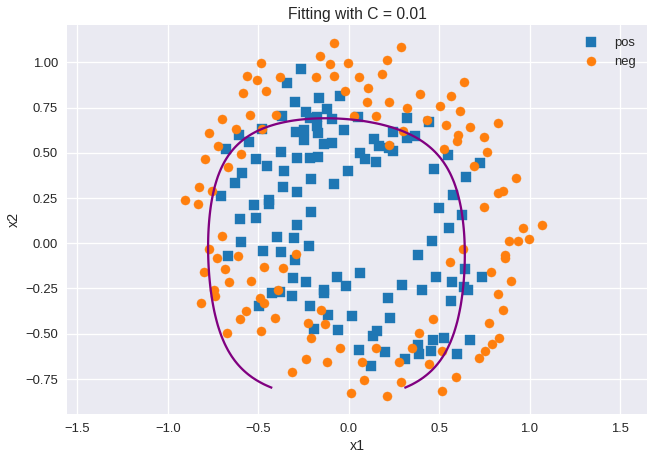

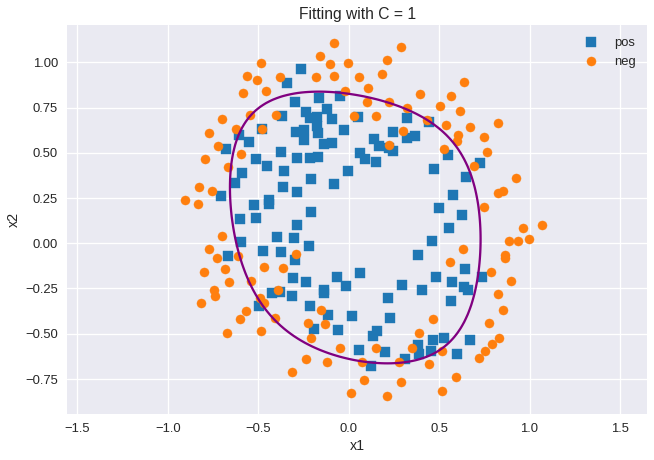

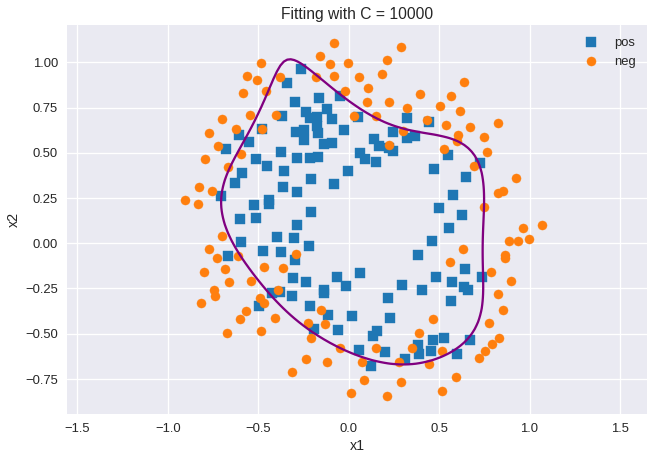

In [11]:
from sklearn.model_selection import train_test_split

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

# Function to draw scatter plot between two variables
def draw_plot(x1, x2, pos, neg, C):
    plt.figure()
    plt.scatter(x1[pos], x2[pos], marker="s", label="pos")
    plt.scatter(x1[neg], x2[neg], marker="o", label="neg")
    plt.xlabel('x1')
    plt.ylabel("x2")
    plt.axes().set_aspect('equal', 'datalim')
    plt.legend()
    plt.title(f"Fitting with {C = }")


# Create higher order polynomial for independent variables
order_no = 6

# Map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order=order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(iter())

out = map_features(x1, x2, order=order_no)
X = out.T
y = data['class']

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order=order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels=[0], colors=['purple'])
    plt.legend()

# Fit with C = 0.01
Cs = [0.01, 1, 10000]
for C in Cs:
    clf = LogisticRegression(C=C).fit(X_train, y_train)
    print(f"Train Accuracy for {C = }:\t{clf.score(X_train, y_train)}")
    print(f"Test  Accuracy for {C = }:\t{clf.score(X_test, y_test)}")

    draw_plot(x1, x2, pos, neg, C)
    draw_boundary(clf)

> Notice that with higher order regularization, value overfitting occurs. The same can be determined by looking at the accuracy between train and test datasets(i.e., accuracy drops significantly in the test data set).


Multiclass Logistic Regression
------------------------------
### Load Data

In [12]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Class labels:", np.unique(y))
print(f"{X = }")

Class labels: [0 1 2]
X = array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2,

### Normalize Data

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(f"{X = }")

X = array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
  

### Split Data
Split data into train and test.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training Logistic Regression Model and Evaluating

In [15]:
lr = LogisticRegression(penalty='l1', C=10, random_state=0, solver="liblinear")
lr.fit(X_train, y_train)
y_ptr = lr.predict(X_train)
y_pte = lr.predict(X_test)

# Generate evaluation metrics
print("Train - Accuracy:\n", metrics.accuracy_score(y_train, y_ptr))
print("Train - Confusion matrix:\n", metrics.confusion_matrix(y_train, y_ptr))
print("Train - Classification report:\n", metrics.classification_report(y_train, y_ptr))

print("Test  - Accuracy:\n", metrics.accuracy_score(y_test, y_pte))
print("Test  - Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pte))
print("Test  - Classification report:\n", metrics.classification_report(y_test, y_pte))

Train - Accuracy:
 0.9809523809523809
Train - Confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  0 39]]
Train - Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

Test  - Accuracy:
 0.9777777777777777
Test  - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test  - Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98  

### Generalized Linear Models
Different GLM Distribution Family

| Family | Description |
| ------ | ----------- |
| Binomial | Target variable is binary response |
| Poisson | Target variable is a count of occurrence |
| Gaussian | Target variable is a continuous number |
| Gamma | This distribution arises when the waiting times between Poisson distribution events are relevant (i.e., a number of events occurred between two time periods) |
| Inverse Gaussian | The tails of the distribution decrease slower than normal distribution (i.e., there is an inverse relationship between the time required to cover a unit distance and distance covered in unit time) |
| Negative Binomial | Target variable denotes the number of successes in a sequence before a random failure |


In [16]:
import statsmodels.api as sm

df = pd.read_csv("../data/Grade_Set_1.csv")
print("####### Linear Regression Model #######")

# Create a linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied[:, np.newaxis]
y = df.Test_Grade.values

# Train the model using the training sets
lr.fit(x, y)

print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

print("\n####### Generalized Linear Model #######")

# In able to run GLM, we'll have to add the intercept constant to x variable
x = sm.add_constant(x, prepend=False)

# Instantiate a gaussian family model with the default link function
model = sm.GLM(y, x, family=sm.families.Gaussian())
model = model.fit()

model.summary()

####### Linear Regression Model #######
Intercept: 49.67777777777776
Coefficient: [5.01666667]

####### Generalized Linear Model #######


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:                            GLM   Df Residuals:                        7
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          5.3627
Method:                          IRLS   Log-Likelihood:                -19.197
Date:                Sun, 26 Jul 2020   Deviance:                       37.539
Time:                        21:16:37   Pearson chi2:                     37.5
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.0167      0.299     16.780      0.000       4.431       5.603
const         49.6778      1.953     25.439      0.000      45.850      53.505
==============================================================================
"""

In [17]:
help(sm.add_constant)

Help on function add_constant in module statsmodels.tools.tools:

add_constant(data, prepend=True, has_constant='skip')
    Add a column of ones to an array.
    
    Parameters
    ----------
    data : array_like
        A column-ordered design matrix.
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if any column has a constant value. Using 'add' will add a
        column of 1s if a constant column is present.
    
    Returns
    -------
    array_like
        The original values with a constant (column of ones) as the first or
        last column. Returned value type depends on input type.
    
    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the added
    column

Supervised Learning-Process Flow
================================

> First, you need to train and validate a supervised model by applying ML techniques to historical data. Then apply this model to the new data set to predict the future value.


Decision Trees
--------------
> In 1986, J. R. Quinlan published [Introduction of Decision Trees](https://doi.org/10.1007/BF00116251) summarizing an approach to synthesizing decision trees using ML. A decision tree consists of three types of nodes:
> - Root node
> - Branch node
> - Leaf node (class label)

> The advantage of the decision tree is that there is no need for exclusive creation of *dummy variables*.


### How the Tree Splits and Grows
> - The base algorithm is known as a greedy algorithm, in which a tree is constructed in a top-down recursive divide-and-conquer manner.
> - At the start, all the training examples are at the root.
> - Input data is partitioned recursively based on selected attributes.
> - Test attributes at each node are selected on the basis of a heuristic or statistical impurity measure example: Gini or information gain (entropy).
>   - Gini = $1 - \sum_i (p_i)^2$, where $p_i$ is the probability of each label.
>   - Entropy = $-p \log_2(p) - q \log_2(q)$, where $p$ and $q$ represent the probability of success/failure respectively in a given node.


### Conditions for Stopping Partitioning
> - All samples for a given node belong to the same class.
> - There are no remaining attributes for further partitioning--majority voting is employed for classifying the leaf.
> - There are no samples left.

Train - Accuray:	 1.0
Train - Confusion matrix:	 [[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
Train - Classification report:	               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Test  - Accuracy:	 0.9777777777777777
Test  - Confusion matrix:	 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test  - Classification report:	               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.

[Text(232.12800000000001, 349.8066, 'X[3] <= -0.591\nentropy = 1.58\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(174.096, 272.07180000000005, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(290.16, 272.07180000000005, 'X[2] <= 0.678\nentropy = 0.993\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(116.06400000000001, 194.33700000000002, 'X[3] <= 0.593\nentropy = 0.431\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(58.032000000000004, 116.60219999999998, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(174.096, 116.60219999999998, 'X[1] <= 0.098\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(116.06400000000001, 38.86740000000003, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(232.12800000000001, 38.86740000000003, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(464.25600000000003, 194.33700000000002, 'X[3] <= 0.725\nentropy = 0.179\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(406.22400000000005, 116.60219999999998, 'X[3] <= 0.593\nentropy = 0.811\nsa

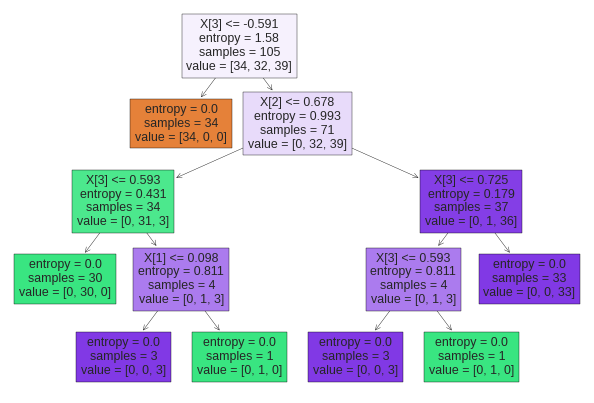

In [18]:
from sklearn import tree

X = iris.data
y = iris.target

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
clf.fit(X_train, y_train)
y_ptr = clf.predict(X_train)
y_pte = clf.predict(X_test)

# Generate evaluation metrics
print("Train - Accuray:\t", metrics.accuracy_score(y_train, y_ptr))
print("Train - Confusion matrix:\t", metrics.confusion_matrix(y_train, y_ptr))
print("Train - Classification report:\t", metrics.classification_report(y_train, y_ptr))

print("Test  - Accuracy:\t", metrics.accuracy_score(y_test, y_pte))
print("Test  - Confusion matrix:\t", metrics.confusion_matrix(y_test, y_pte))
print("Test  - Classification report:\t", metrics.classification_report(y_test, y_pte))

tree.plot_tree(clf, filled=True)

### Key Parameters for Stopping Tree Growth
> One of the key issues with a decision tree is that the tree can grow very large, ending up creating one leaf per observation.

> *max_features*: Maximum features to be considered while deciding each split; default = `None`, which means all features will be considered.
> *min_samples_split*: Split will not be allowed for nodes that do not meet this number.
> *min_samples_leaf*: Leaf node will not be allowed for nodes less than the minimum samples.
> *max_depth*: No further split will be allowed; default = `None`.


Support Vector Machine
----------------------
> Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963 proposed SVM. A key objective of SVM is to draw a hyperplane that separates the two classes optimally such that the margin is maximum between the hyperplane and the observations.

In [19]:
from sklearn.svm import SVC

X = iris.data[:, [2, 3]]
y = iris.target

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = SVC(kernel="linear", C=1.0, random_state=0)
clf.fit(X_train, y_train)
y_ptr = clf.predict(X_train)
y_pte = clf.predict(X_test)

# Generate evaluation metrics
print("Train - Accuracy:\n", metrics.accuracy_score(y_train, y_ptr))
print("Train - Confusion matrix:\n",metrics.confusion_matrix(y_train, y_ptr))
print("Train - classification report:\n", metrics.classification_report(y_train, y_ptr))

print("Test  - Accuracy:\n", metrics.accuracy_score(y_test, y_pte))
print("Test  - Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pte))
print("Test  - Classification report:\n", metrics.classification_report(y_test, y_pte))

Train - Accuracy:
 0.9523809523809523
Train - Confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Test  - Accuracy:
 0.9777777777777777
Test  - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test  - Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98  

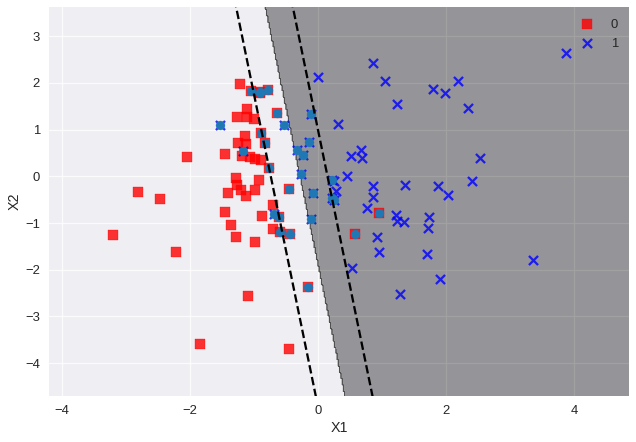

In [20]:
from sklearn.datasets import make_classification

def plot_decision_regions(X, y, classifier):
    h = .02 # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)

X, y = make_classification(100, 2, 2, 0, weights=[.5, .5], random_state=0)

# Build a simple logistic regression model
clf = SVC(kernel="linear", random_state=0)
clf.fit(X, y)

# Get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1.5, 1.5)
yy = a * xx - clf.intercept_[0] / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)

# Plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80)
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

$k$-Nearest Neighbors
---------------------
> The $k$-nearest neighbor classification (kNN) was developed from the need to perform discriminant analysis when reliable parametric estimates of probability densitieds are unknown or difficult to determine. Fix and Hodges in 1951 introduced a nonparametric method for pattern classification that has since become known as the $k$-nearest neighbor rule.

> The key drawback of kNN is the complexity in searching the nearest neighbors for each sample.

> - $k$ must **not** be a multiple of the number of classes.

In [21]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric="minkowski")
clf.fit(X_train, y_train)

# Generate evaluation metrics
print("Train - Accuracy:\n", metrics.accuracy_score(y_train, y_ptr))
print("Train - Confusion matrix:\n",metrics.confusion_matrix(y_train, y_ptr))
print("Train - classification report:\n", metrics.classification_report(y_train, y_ptr))

print("Test  - Accuracy:\n", metrics.accuracy_score(y_test, y_pte))
print("Test  - Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pte))
print("Test  - Classification report:\n", metrics.classification_report(y_test, y_pte))

Train - Accuracy:
 0.9523809523809523
Train - Confusion matrix:
 [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105

Test  - Accuracy:
 0.9777777777777777
Test  - Confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Test  - Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98  

Time-Series Forecasting
-----------------------
> Time-series data having the mean and variance as constant is called a *stationary time series*.

> Time series tend to have a linear relationship between lagged variables and this is called *autocorrelation*. Hence time-series historic data can be modeled to forecast future data points without the involvement of any other independent variables; these types of models are generally known as *time-series forecasting*.


### Components of Time Series
> A time series can be made up of three key components:
> - *Trend*: A long-term increase or decrease is termed a trend.
> - *Seasonality*: An effect of seasonal factors for a fixed or known period.
> - *Cycle*: These are the longer ups and downs that are not of fixed or known period, caused by external factors.


### Autoregressive Integrated Moving Average (ARIMA)
> *Autoregressive model* (AM): a regression of the varaible against itself (i.e., the linear combination of past values of the variable is used to forecast the future value).
\begin{equation}
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_n y_{t-n} + e_t,
\end{equation}
> where $c$ is constant, $e_t$ is the random error, $y_{t-1}$ is the first-order correlation, and $y_{t-2}$ the second-order correlation between values two periods apart.

> *Moving average* (MA): Instead of past values, past forecast errors are used to build a model.
\begin{equation}
y_t = c + \theta_1 y_{t-1} + \theta_2 y_{t-2} + \cdots + \theta_n y_{t-n} + e_t.
\end{equation}

In [22]:
df = pd.read_csv("../data/TS.csv")
df

,Month,Sales
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts = pd.Series(df["Sales"].to_list(), index=pd.to_datetime(df.Month,
                format="%Y-%m"))
ts

Month
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
             ... 
1971-01-01    628
1971-02-01    308
1971-03-01    324
1971-04-01    248
1971-05-01    272
Length: 77, dtype: int64

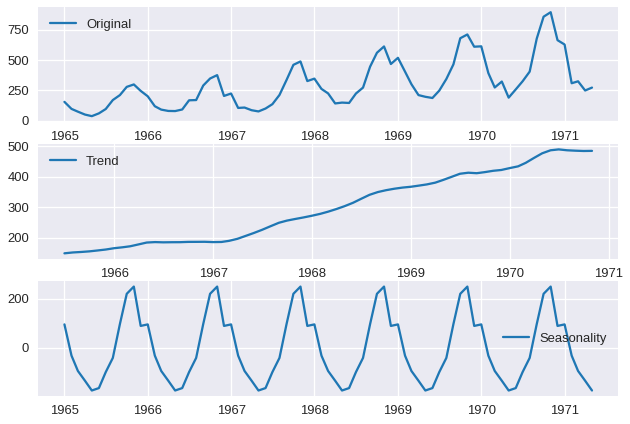

In [24]:
decomposition = seasonal_decompose(ts)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig, ax = plt.subplots(3, 1)

ax[0].plot(ts, label="Original")
ax[0].legend()
ax[1].plot(trend, label="Trend")
ax[1].legend()
ax[2].plot(seasonal, label="Seasonality")
ax[2].legend()

### Checking for Stationary

Log transform stationary check p value: 0.785310212484911
First order difference stationary check p value: 0.02402539283987472


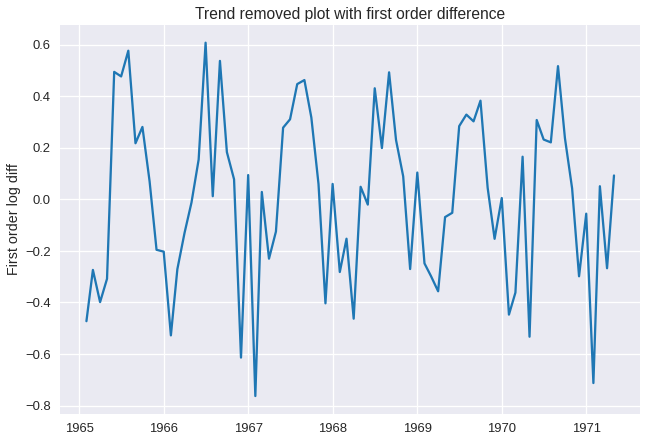

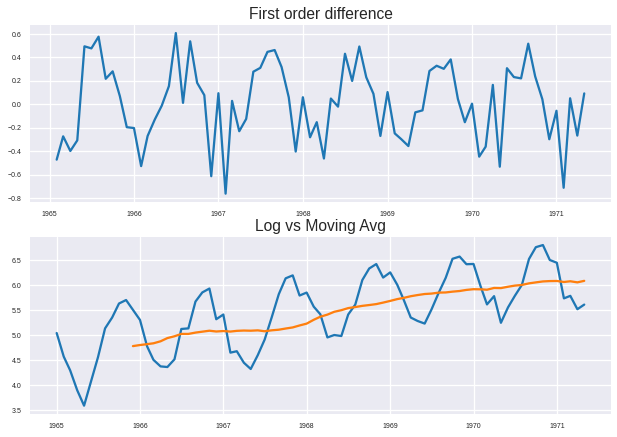

In [25]:
from statsmodels.tsa.stattools import adfuller

# Log transform
ts_log = np.log(ts)
ts_log.dropna(inplace=True)

s_test = adfuller(ts_log, autolag="AIC")

print("Log transform stationary check p value:", s_test[1])

# Take first difference
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)

plt.title("Trend removed plot with first order difference")
plt.plot(ts_log_diff)
plt.ylabel("First order log diff")

s_test = adfuller(ts_log_diff, autolag="AIC")

print("First order difference stationary check p value:", s_test[1])

# Moving average smoothens the line
moving_avg = ts_log.rolling(12).mean()

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.set_title("First order difference")
ax1.tick_params(axis="x", labelsize=7)
ax1.tick_params(axis="y", labelsize=7)
ax1.plot(ts_log_diff)

ax2.set_title("Log vs Moving Avg")
ax2.tick_params(axis="x", labelsize=7)
ax2.tick_params(axis="y", labelsize=7)
ax2.plot(ts_log)
ax2.plot(moving_avg)

### Autocorrelation Test

Text(0.5, 0, 'Lags')

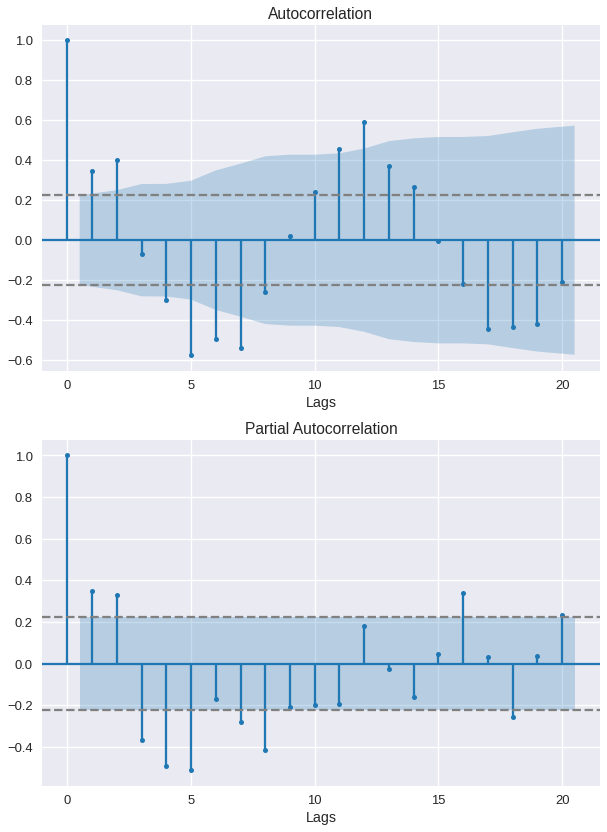

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))

# ACF chart
fig = sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=20, ax=ax1)

# Draw 95% confidence interval line
ax1.axhline(y = -1.96 / np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
ax1.axhline(y = +1.96 / np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
ax1.set_xlabel("Lags")

# PACF chart
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=20, ax=ax2)

# Draw 95% confidence interval line
ax2.axhline(y = -1.96 / np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
ax2.axhline(y = +1.96 / np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
ax2.set_xlabel("Lags")

> The PACF plot has a significant spike only at lag 1, meaning that all the higher order autocorrelations are effectively explained by the lag-1 and lag-2 autocorrelation. Ideal lag values are $p = 2$ and $q = 2$ (i.e., the lag value where the ACF/PACF chart crosses the upper confidence interval for the first time).


### Build Model and Evaluate

In [27]:
# Build model
pdq = (2, 0, 2)
model = sm.tsa.ARIMA(ts_log, order=pdq)
results_ARIMA = model.fit(disp=-1)

ts_predict = results_ARIMA.predict()

# Evaluate model
print("AIC:", results_ARIMA.aic)
print("BIC:", results_ARIMA.bic)

print("Mean Absolute Error:", mean_absolute_error(ts_log.values, ts_predict.values))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print("Durbin-Watson statistics:", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC: 7.852110538087089
BIC: 21.914943069209194
Mean Absolute Error: 0.19596610786692262
Root Mean Squared Error: 0.23979218649487738
Durbin-Watson statistics: 1.8645777724850938
/Data/Repos/DIY-Python/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


> The usual practice is to build several models with different $P$ and $q$ and select the one with the smallest value of AIC, BIC, MAE, and RMSE.

/Data/Repos/DIY-Python/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
AIC: -7.786738466847595
BIC: 8.619899486128194
Mean Absolute Error: 0.16726593603689516
Root Mean Squared Error: 0.21614317311619707
Durbin-Watson statistic: 2.518647570424185


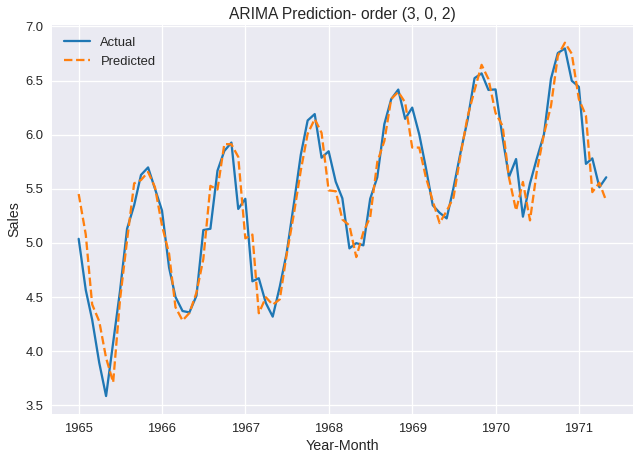

In [28]:
pdq = (3, 0, 2)
model = sm.tsa.ARIMA(ts_log, order=pdq)
results_ARIMA = model.fit(disp=-1)

ts_predict = results_ARIMA.predict()
plt.title(f"ARIMA Prediction- order {pdq}")
plt.plot(ts_log, label="Actual")
plt.plot(ts_predict, '--', label="Predicted")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()

print("AIC:", results_ARIMA.aic)
print("BIC:", results_ARIMA.bic)

print("Mean Absolute Error:", mean_absolute_error(ts_log.values, ts_predict.values))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))

# Check autocorrelation
print("Durbin-Watson statistic:", sm.stats.durbin_watson(results_ARIMA.resid.values))

/Data/Repos/DIY-Python/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Data/Repos/DIY-Python/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
AIC: -35.418987737588935
BIC: -19.103854355584616
Mean Absolute Error: 0.13876538128404592
Root Mean Squared Error: 0.18310242712383848
Durbin-Watson statistic: 1.9411656703199347


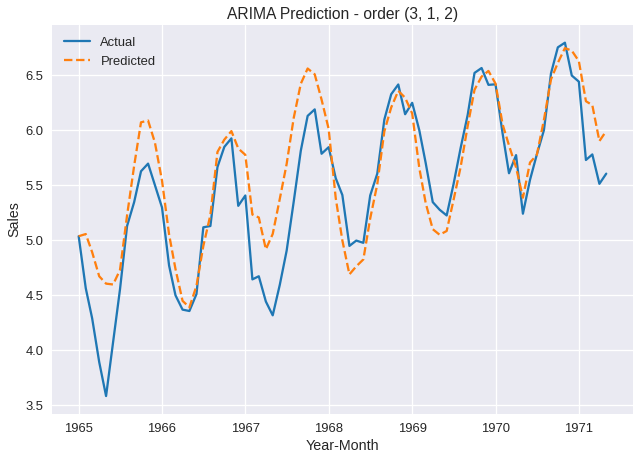

In [29]:
pdq = (3, 1, 2)
model = sm.tsa.ARIMA(ts_log, order=pdq)
results_ARIMA = model.fit(disp=-1)

ts_predict = results_ARIMA.predict()

# Correction for difference
predictions_ARIMA_diff = pd.Series(ts_predict, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)

plt.title(f"ARIMA Prediction - order {pdq}")
plt.plot(ts_log, label="Actual")
plt.plot(predictions_ARIMA_log, '--', label="Predicted")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()

print("AIC:", results_ARIMA.aic)
print("BIC:", results_ARIMA.bic)

print("Mean Absolute Error:", mean_absolute_error(ts_log_diff.values, ts_predict.values))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(ts_log_diff.values, ts_predict.values)))

# Check autocorrelation
print("Durbin-Watson statistic:", sm.stats.durbin_watson(results_ARIMA.resid.values))

### Predicting Future Values
Below values $(p=3, d=0, q=2)$ is giving the smaller number for evaluation metrics, so let's use this as a final model to predict the future values, for the year 1972.

/Data/Repos/DIY-Python/lib64/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


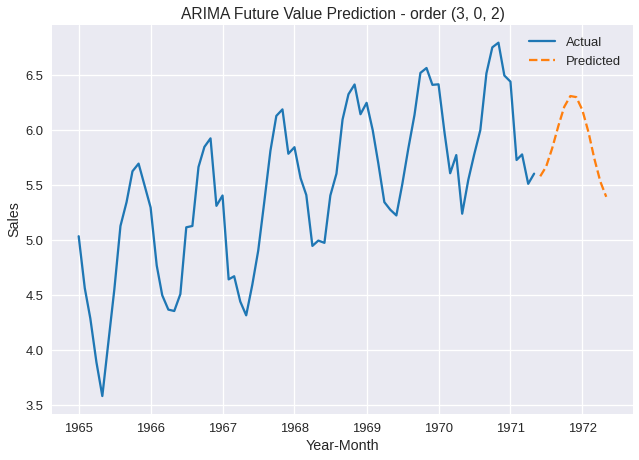

In [30]:
# Final model
pdq = (3, 0, 2)
model = sm.tsa.ARIMA(ts_log, order=pdq)
results_ARIMA = model.fit(disp=-1)

# Predict future values
ts_predict = results_ARIMA.predict("1971-06-01", "1972-05-01")

plt.title(f"ARIMA Future Value Prediction - order {pdq}")
plt.plot(ts_log, label="Actual")
plt.plot(ts_predict, '--', label="Predicted")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()

Unsupervised Learning Process Flow
==================================


Clustering
----------
> Clustering is an unsupevised learning problem. The key objective is to identify distinct groups (called *clusters*) based on some notion of similarity within a given dataset. Clustering analysis origins can be traced to the areas of anthropology and psychology in the 1930s. Most popularly used clustering techniques are $k$-means (divisive) and hierarchical (agglomerative).


### $k$-means
> The key objective of the $K$-means algorithm is to organize data into clusters such that there is a high intracluster similarity and low intercluster similarity. An item will only belong to one cluster, not several (i.e., it generates a specific number of disjoint, non-hierarchial clusters). $k$-means uses the strategy of divide and concur, and is a classic example for *expectation maximization* (EM) algorithms.

> EM algorithms are made up of two steps:
>
> 1. known as the *expectation* (E), is to find the expected point associated with a cluster;
> 2. known as *maximization* (M), is to improve the estimation of the cluster using knowledge from the first step.
>
> The two steps are processed repeatedly until convergence is reached.

> Suppose we have $n$ data points that we need to cluster into $k$ (c1, c2, c3) groups.
>
> 1. $k$ centroids is randomly picked (only in the first iteration) and all the points that are nearest to each centroid point are assigned to that specific cluster. The centroid is the arithmetic mean or average position of all the points.
> 2. The centroid point is recalculated using the average of the coordinates of all the points in that cluster. Then step one is repeated (assign the nearest point) until the clusters converge.

> **Note**: $k$-means is designed for Euclidean distance only.


### Limitations of $k$-means
> - $k$-means clustering needs the number of clusters to be specified.
> - $k$-means has problems when clusters are of different sizes, densities, and nonglobular shapes.
> - The presence of an outlier can skew the results.

In [31]:
from sklearn.cluster import KMeans

iris = datasets.load_iris()

# Convert to dataframe
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['species'])

# Remove spaces from column name
iris.columns = iris.columns.str.replace(' ', '')
iris.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [32]:
X = iris.iloc[:, :3]
y = iris.species
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# K Means Cluster
model = KMeans(n_clusters=3, random_state=11)
model.fit(X)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


> Compare the above results with the actual species label to understand the accuracy of grouping similar records.

Accuracy: 0.8066666666666666
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.71      0.70      0.71        50
           2       0.71      0.74      0.73        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



Text(0.5, 1.0, 'Petal (Predicted)')

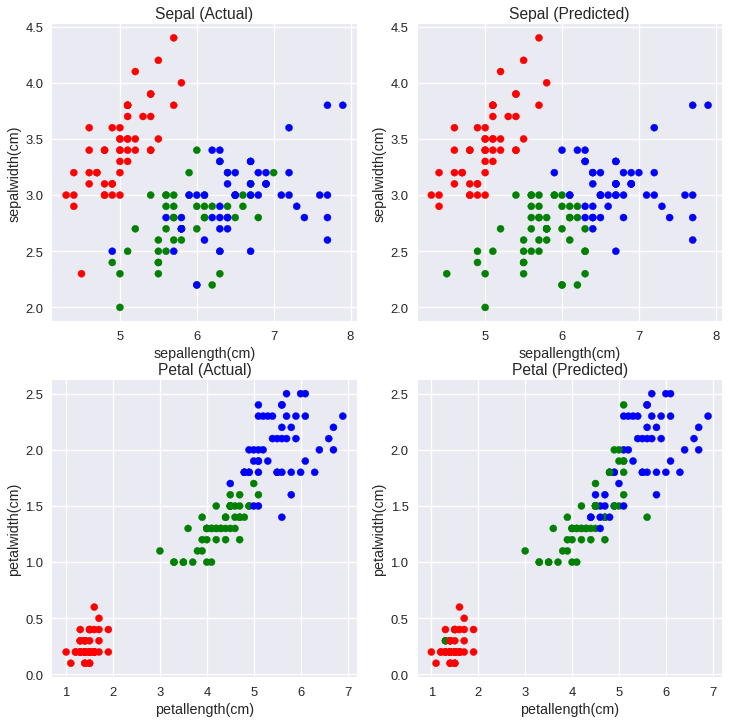

In [33]:
from matplotlib.colors import ListedColormap

iris['species'] = iris.species.astype(np.int64)
iris['pred_species'] = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)

print("Accuracy:", metrics.accuracy_score(iris.species, iris.pred_species))
print("Classification report:",metrics.classification_report(iris.species, iris.pred_species))

# Set the size of the plot
# plt.figure()

# Create a colormap for red, green and blue
cmap = ListedColormap(['r', 'g', 'b'])

# Plot Sepal
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.species), marker="o", s=50)
ax[0, 0].set_xlabel("sepallength(cm)")
ax[0, 0].set_ylabel("sepalwidth(cm)")
ax[0, 0].set_title("Sepal (Actual)")

ax[0, 1].scatter(iris['sepallength(cm)'], iris['sepalwidth(cm)'], c=cmap(iris.pred_species), marker="o", s=50)
ax[0, 1].set_xlabel("sepallength(cm)")
ax[0, 1].set_ylabel("sepalwidth(cm)")
ax[0, 1].set_title("Sepal (Predicted)")

ax[1, 0].scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.species), marker="o", s=50)
ax[1, 0].set_xlabel("petallength(cm)")
ax[1, 0].set_ylabel("petalwidth(cm)")
ax[1, 0].set_title("Petal (Actual)")

ax[1, 1].scatter(iris['petallength(cm)'], iris['petalwidth(cm)'], c=cmap(iris.pred_species), marker="o", s=50)
ax[1, 1].set_xlabel("petallength(cm)")
ax[1, 1].set_ylabel("petalwidth(cm)")
ax[1, 1].set_title("Petal (Predicted)")

### Finding the Value of $k$
> Two methods are commonly used to determine the value of $k$:
> - Elbow method
> - Average silhouette method


### Elbow Method
> Perform $k$-means clustering on the dataset for a range of value $k$ (for example 1 to 10) and calculate the SSE or percentage of variance explained for each $k$. Plot a line chart for cluster number vs. SSE, then look for an elbow shape on the line graph, which is the ideal number of cluster.

Text(0.5, 1.0, 'Elbow for KMeans clustering')

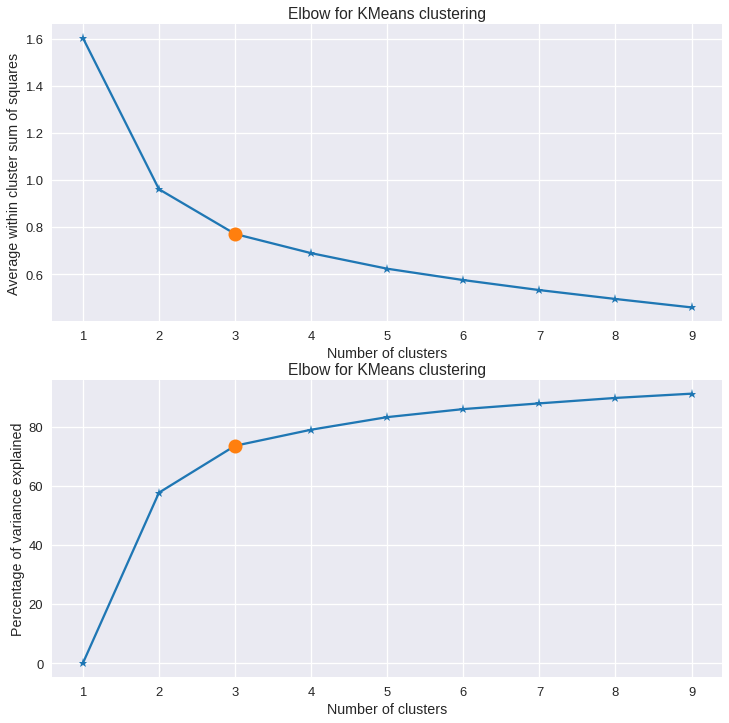

In [34]:
from scipy.spatial.distance import cdist, pdist

K = range(1, 10)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis=1) for D in D_k]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d) / X.shape[0] for d in dist]

# Total within sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2) / X.shape[0]
bss = tss - wcss
varExplained = bss / tss * 100

# kIdx = 10 - 1

kIdx = 2

# Elbow curve
# Set the size of the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(K, avgWithinSS, '*-')
ax1.plot(K[kIdx], avgWithinSS[kIdx], marker="o", markersize=12, markeredgewidth=2)
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("Average within cluster sum of squares")
ax1.set_title("Elbow for KMeans clustering")

ax2.plot(K, varExplained, '*-')
ax2.plot(K[kIdx], varExplained[kIdx], marker="o", markersize=12, markeredgewidth=2)
ax2.set_xlabel("Number of clusters")
ax2.set_ylabel("Percentage of variance explained")
ax2.set_title("Elbow for KMeans clustering")

### Average Silhouette Method
> In 1986, Peter J. Rousseuw described the silhouette method, which aims to explain the consistency within cluster data. Silhouette value will range between -1 and 1. A high value indicates that items are well matched within the cluster and weakly matched to the neighboring cluster.

Text(0.5, 1.0, 'Silhouette for K-means')

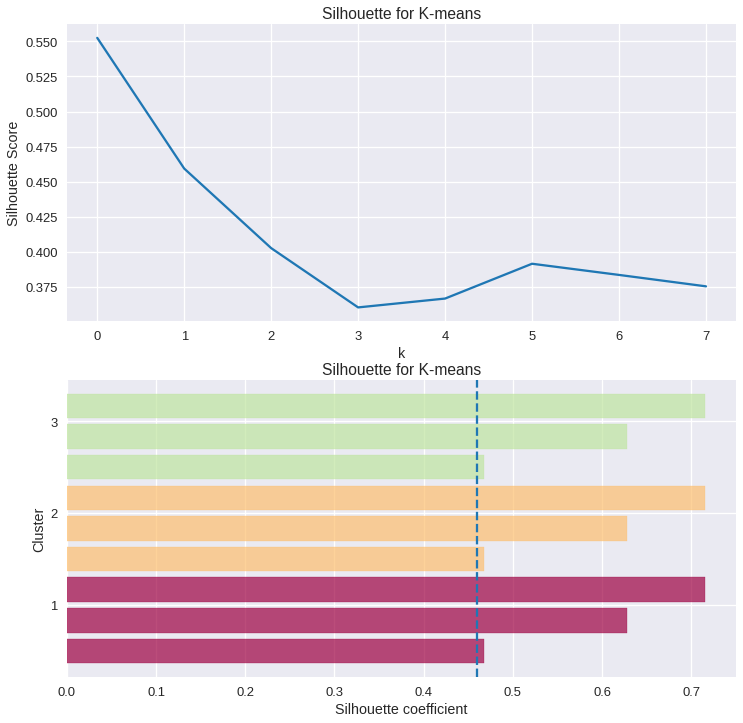

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm

score = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    score.append(silhouette_score(X, labels, metric="euclidean"))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(score)
ax1.set_xlabel("k")
ax1.set_ylabel("Silhouette Score")
ax1.set_title("Silhouette for K-means")

# Initialize the cluster with n_clusters value and a random generator
model = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=0)
model.fit_predict(X)
cluster_labels = np.unique(model.labels_)
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhoutte_vals = silhouette_samples(X, model.labels_)

# Get spectral values for colormap
cmap = cm.get_cmap("Spectral")

y_lower, y_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhoutte_vals[cluster_labels]
    c_silhouette_vals.sort()
    y_upper += len(c_silhouette_vals)
    color = cmap(float(i) / n_clusters)
    ax2.barh(range(y_lower, y_upper), c_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhoutte_vals)

ax2.set_yticks(yticks)
ax2.set_yticklabels(cluster_labels+1)

# The vertical line for average silhouette score of all the values
ax2.axvline(x=silhouette_avg, linestyle='--')
ax2.set_xlabel("Silhouette coefficient")
ax2.set_ylabel("Cluster")
ax2.set_title("Silhouette for K-means")

### Hierarchical Clustering
> Agglomerative clustering is a hierarchical cluster technique that builds nested clusters with a bottom-up approach where each data point starts in its own cluster and as we move up, the clusters are merged based on a distance matrix.

In [36]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Cluster
model = AgglomerativeClustering(n_clusters=3)

# Fit the model to the iris data set that we have previously imported
model.fit(X)

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [37]:
iris['pred_species'] = model.labels_

print("Accuracy:", metrics.accuracy_score(iris.species, iris.pred_species))
print("Classification report:", metrics.classification_report(iris.species, iris.pred_species))

Accuracy: 0.7733333333333333
Classification report:               precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.64      0.74      0.69        50
           2       0.70      0.60      0.65        50

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.78      0.77      0.77       150



> Hierarchical clusterings result arrangement can be better interpreted with dendrogram visualization. SciPy provides necessary functions for dendrogram visualization.

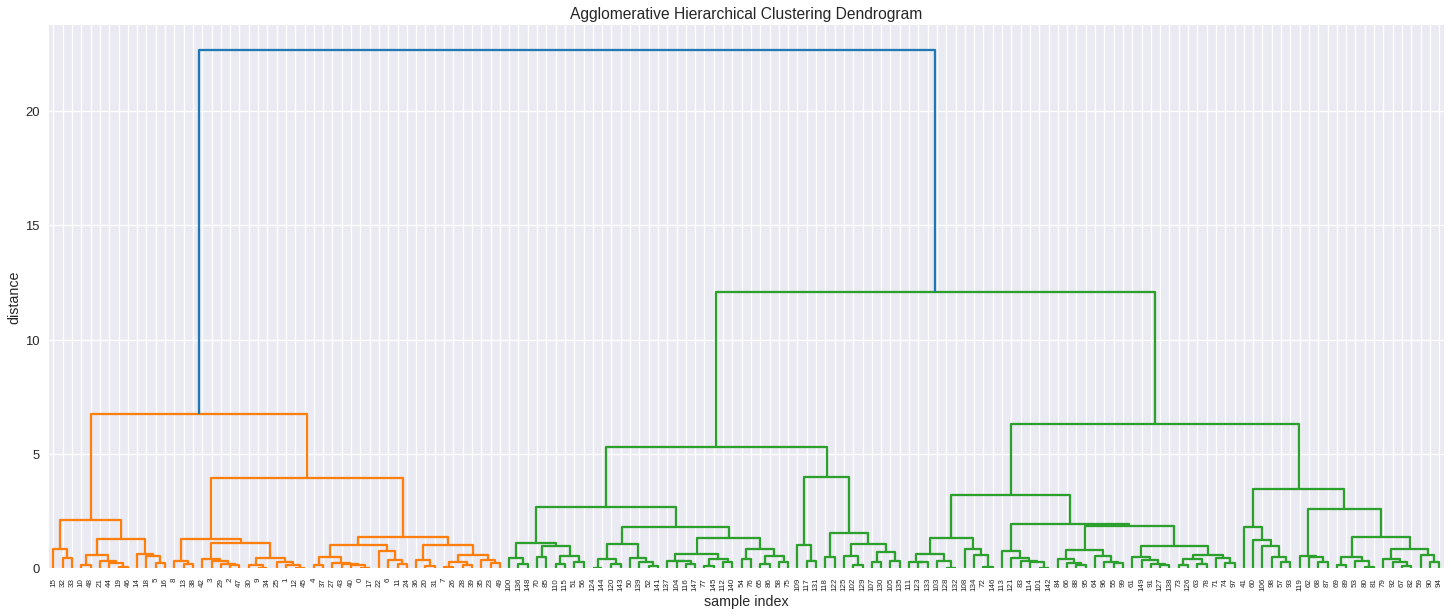

In [38]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

# Generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))

# Calculate full dendrogram
fig, ax = plt.subplots(figsize=(25, 10))

ax.set_title("Agglomerative Hierarchical Clustering Dendrogram")
ax.set_xlabel("sample index")
ax.set_ylabel("distance")
dn = dendrogram(
    Z,
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
    ax=ax,
)

> Since we know that $k = 3$, we can cut the tree at a distance threshold of around ten to get exactly three distinct clusters.


Principal Component Analysis (PCA)
----------------------------------
> Principal component analysis (PCA) is the most popular unsupervised linear transformation technique for dimensionality reduction. PCA finds the directions of maximum variance in high-dimensional data such that most of the information is retained, and projects it onto a smaller dimensional subspace.

> The PCA approach can be summarized as follows:
> - Standardize data.
> - Use standardized data to generate a covariance matrix or correlation matrix.
> - Perform eigen decomposition: compute eigenvectors that are the principal component, which will give the direction, and compute eigenvalues, which will give the magnitude.
> - Sort the eigen pairs and select eigenvectors with the largest eigenvalues, which cumulatively captures information above a certain threshold (say 95%).

Covariance matrix
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
Eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
Eigenvalues
[2.93808505 0.9201649  0.14774182 0.02085386]
Cummulative Variance Explained [ 72.96244541  95.8132072   99.48212909 100.        ]


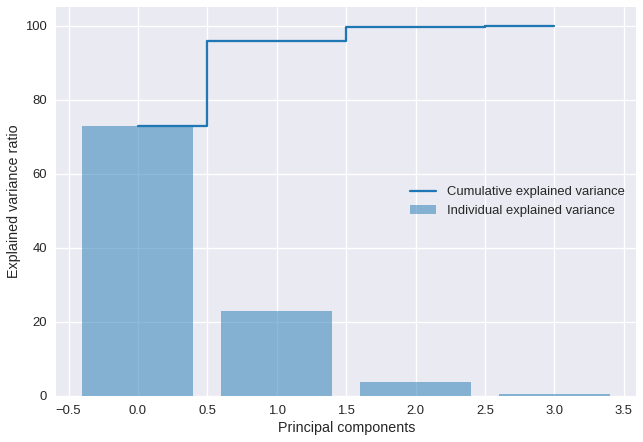

In [39]:
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data

# Standardize data
X_std = StandardScaler().fit_transform(X)

# Create covariance matrix
cov_mat = np.cov(X_std.T)

print(f"Covariance matrix\n{cov_mat}")

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(f"Eigenvectors\n{eig_vecs}")
print(f"Eigenvalues\n{eig_vals}")

# Sort eigenvalues in decreasing order
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cummulative Variance Explained", cum_var_exp)

fig, ax = plt.subplots()

ax.bar(range(4), var_exp, alpha=0.5, align="center", label="Individual explained variance")
ax.step(range(4), cum_var_exp, where="mid", label="Cumulative explained variance")
ax.set_xlabel("Principal components")
ax.set_ylabel("Explained variance ratio")
plt.legend()

> In the preceding plot, we can see that the first three principal components explain 99% of the variance. Let's perform PCA using Scikit-learn and plot the first three eigenvectors.

> source:
> http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

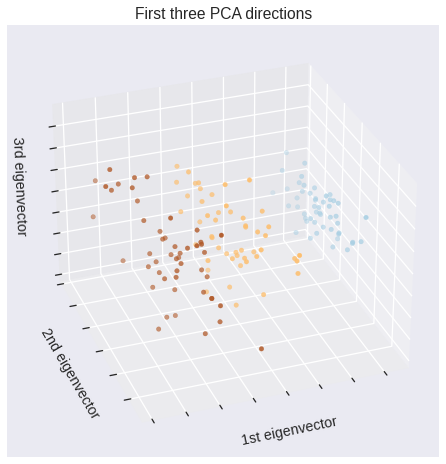

In [40]:
from mpl_toolkits.mplot3d import Axes3D

# Import some data to play with
Y = iris.target

# To get a better understanding of interactionof the dimensions
# Plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=cm.Paired)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])